In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline


In [4]:
x=6*np.random.rand(100,1)-3
#creates 100 randome floating numbrr
y=0.5*pow(x,2)+1.5*x+2+np.random.randn(100,1)


[[-0.33870139]
 [ 2.58685037]
 [ 1.96402964]
 [-2.65979172]
 [ 0.52790947]
 [-0.62303067]
 [-0.05922089]
 [-2.73325414]
 [-0.77136643]
 [ 0.3381945 ]
 [-1.57070945]
 [-0.90013631]
 [-1.14709558]
 [ 1.865843  ]
 [ 1.22003885]
 [-1.90153966]
 [ 2.62740813]
 [ 1.73715003]
 [-0.18159613]
 [ 2.97334801]
 [ 1.68518836]
 [ 2.19879846]
 [-2.14609562]
 [ 0.56366212]
 [ 1.42126529]
 [-2.92351526]
 [-0.41697032]
 [ 1.26225149]
 [ 2.80922024]
 [ 1.74794045]
 [ 1.87367723]
 [-2.94039642]
 [ 2.61689646]
 [ 2.3057442 ]
 [-1.40794868]
 [-0.88700357]
 [ 0.82944829]
 [-1.85871619]
 [ 1.00857938]
 [ 0.33397355]
 [ 0.99560108]
 [ 2.23988249]
 [-0.64639894]
 [ 1.79384433]
 [ 2.47041256]
 [-2.11421877]
 [ 2.80843225]
 [ 0.33405479]
 [ 1.97117645]
 [-1.50784515]
 [ 0.36236938]
 [-1.30769068]
 [-2.1216644 ]
 [ 2.71812774]
 [ 2.75756503]
 [-2.97658198]
 [ 1.02281867]
 [ 0.04104533]
 [ 1.69072894]
 [-2.01372161]
 [ 0.81660524]
 [-1.0155092 ]
 [ 2.42289232]
 [ 0.62030043]
 [-1.76323768]
 [-1.15226299]
 [-2.77255

Text(0, 0.5, 'Y dataset')

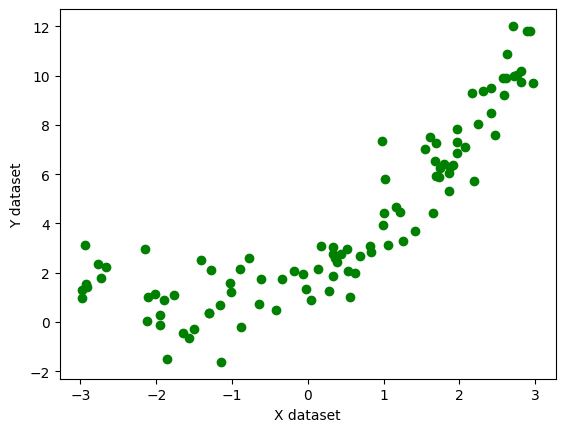

In [6]:
plt.scatter(x,y,color='g')
plt.xlabel("X dataset")
plt.ylabel("Y dataset")

In [7]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [8]:
#implement linear regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression() 
regression.fit(x_train,y_train)



LinearRegression()

In [9]:
#metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
mse=mean_squared_error(y_test,regression.predict(x_test))
mae=mean_absolute_error(y_test,regression.predict(x_test))
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

4.445742730842313
1.7932112622611378
2.108492999950987


In [10]:
from sklearn.metrics import r2_score 
score=r2_score(y_test,regression.predict(x_test))
print(score)

0.7233578689123221


Text(0, 0.5, 'Y Dataset')

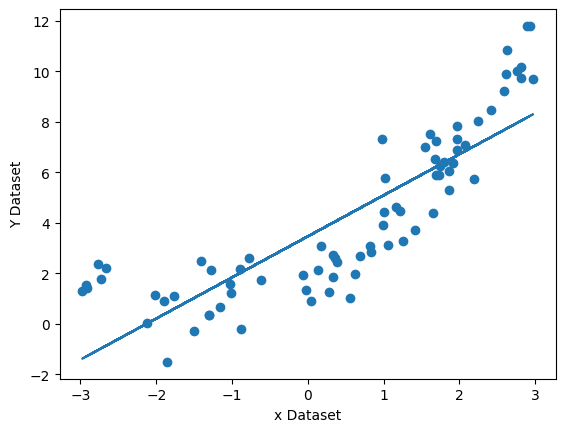

In [13]:
#lets visualize the model 
plt.plot(x_train,regression.predict(x_train))
plt.scatter(x_train,y_train)
plt.xlabel("x Dataset")
plt.ylabel("Y Dataset")


In [28]:
#appply polynomical

from sklearn.preprocessing import  PolynomialFeatures 
poly=PolynomialFeatures(degree=2,include_bias=True)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [29]:
#nw apply linear regression
regression=LinearRegression()
regression.fit(x_train_poly,y_train)
y_pred=regression.predict(x_test_poly)


In [30]:
#metrics 
from sklearn.metrics import r2_score 
score=r2_score(y_test,y_pred)
print(score)

0.9243923796927584


In [31]:
regression.coef_

array([[0.        , 1.54417731, 0.51839518]])

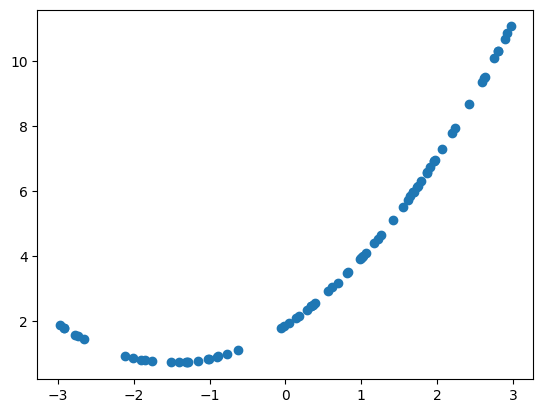

In [32]:
plt.scatter(x_train,regression.predict(x_train_poly))

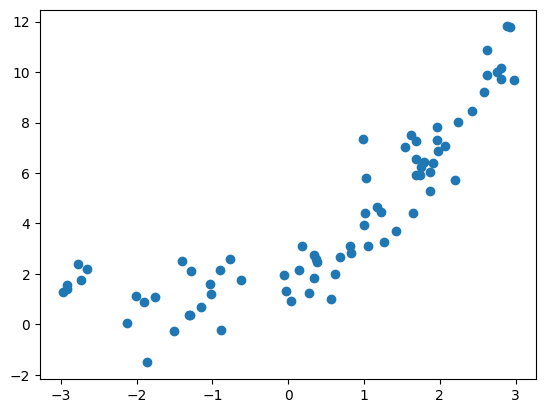

In [35]:
plt.scatter(x_train,y_train)

In [36]:
#prediction on new data 
x_new=np.linspace(-3,3,200).reshape(200,1)
x_new_poly=poly.transform(x_new)
y_new=regression.predict(x_new_poly)

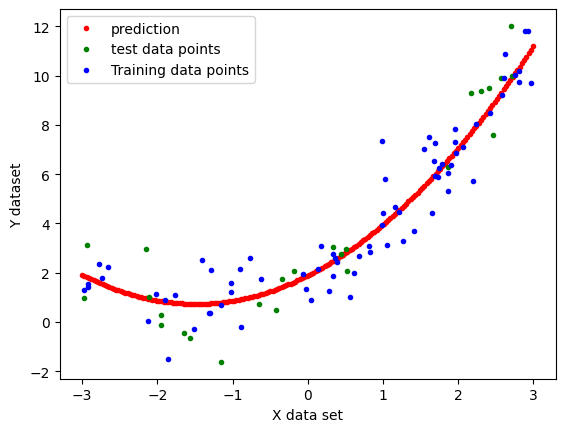

In [40]:
plt.plot(x_new,y_new,"r.",linewidth=2,label="prediction")
plt.plot(x_test,y_test,"g.",linewidth=2,label="test data points")
plt.plot(x_train,y_train,"b.", linewidth=2,label="Training data points")
plt.xlabel("X data set")
plt.ylabel("Y dataset")
plt.legend()

In [50]:
#pipeline
from sklearn.pipeline import Pipeline
def Polynomial_degree(degree):
    x_new=np.linspace(-3,3,200).reshape(200,1)
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    line_reg=LinearRegression() 
    poly_regression=Pipeline([("Poly features",poly_features),("linear_regression",line_reg)])
    poly_regression.fit(x_train,y_train)
    y_pred_new=poly_regression.predict(x_new)
    #plotting predicting line 
    plt.plot(x_new,y_pred_new,'r.',label="degree"+str(degree),linewidth=3)
    plt.plot(x_train,y_train,"b.",linewidth=3)
    plt.plot(x_test,y_test,"g.",linewidth=3)
    plt.xlabel("X data set")
    plt.ylabel("Y dataset")
    plt.legend()
    plt.show()


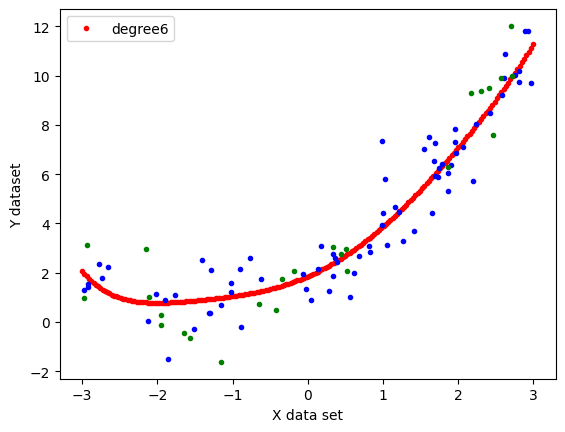

In [55]:
Polynomial_degree(6)